In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("daily-min-temperatures.csv", parse_dates=[0], index_col=0)
if data.shape[1] == 1: 
    data = data.iloc[:, 0]  
    
print(data.head(5))

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


In [3]:
data.describe()

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64

In [4]:
data.tail(5)

Date
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, dtype: float64

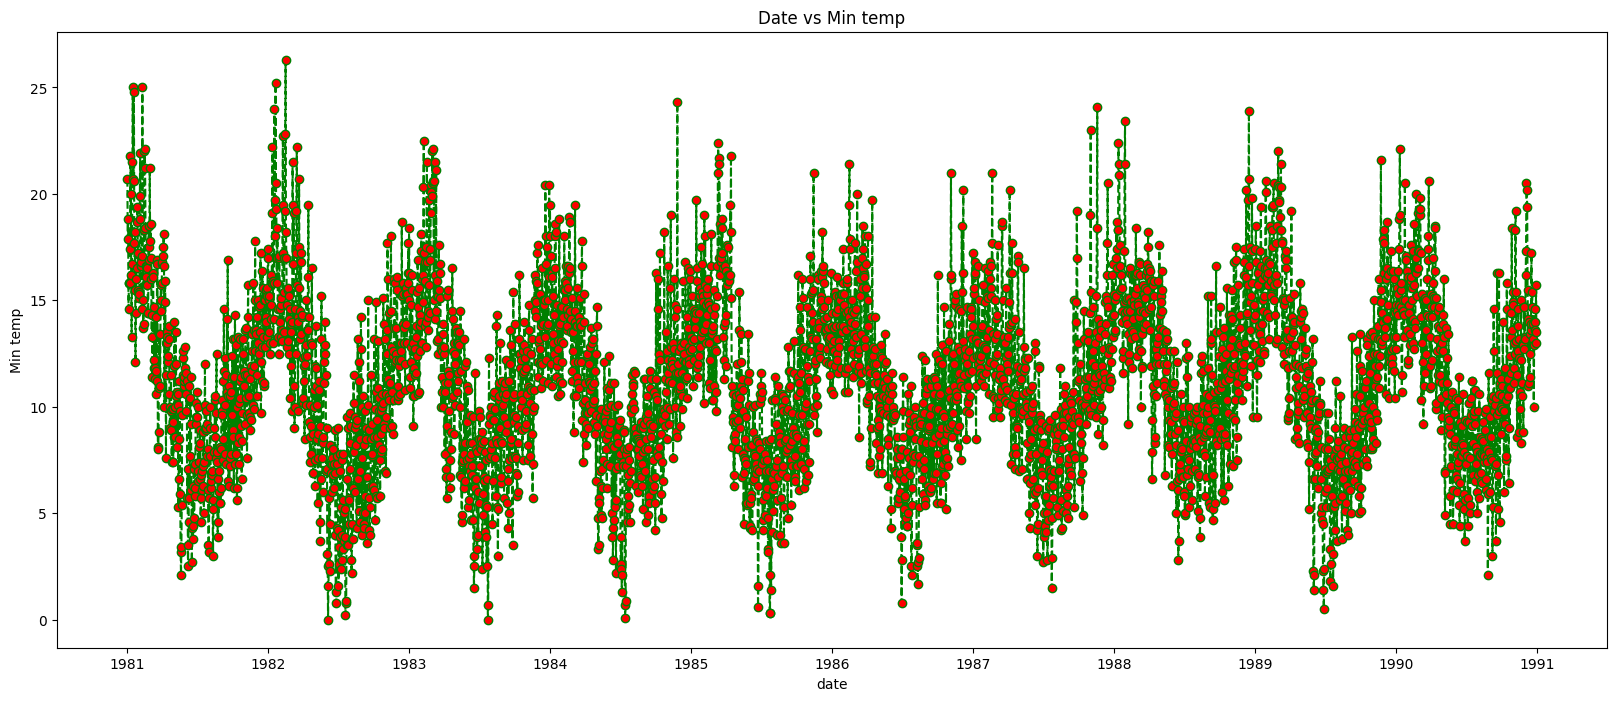

In [6]:
plt.figure(figsize = (20,8))
plt.plot(data, color = 'green', marker = 'o', linestyle = '--', markerfacecolor='red')
plt.title("Date vs Min temp")
plt.xlabel("date")
plt.ylabel("Min temp")

plt.show()

In [37]:
#split into features
df = pd.DataFrame()

df['Month'] = data.index.month
df['Day'] = data.index.day
df['Temperature'] = data.values

print(df.head(10))

   Month  Day  Temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8
5      1    6         15.8
6      1    7         15.8
7      1    8         17.4
8      1    9         21.8
9      1   10         20.0


In [47]:
#implementing lag
temps = pd.DataFrame(data.values)
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis = 1)
dataframe.columns = ['3 shifts', '2 shifts', '1 shift', 'no shift']
print(dataframe.head(10))

   3 shifts  2 shifts  1 shift  no shift
0       NaN       NaN      NaN      20.7
1       NaN       NaN     20.7      17.9
2       NaN      20.7     17.9      18.8
3      20.7      17.9     18.8      14.6
4      17.9      18.8     14.6      15.8
5      18.8      14.6     15.8      15.8
6      14.6      15.8     15.8      15.8
7      15.8      15.8     15.8      17.4
8      15.8      15.8     17.4      21.8
9      15.8      17.4     21.8      20.0


In [57]:
#implementing rolling mean
shifted = temps.shift(0)
window = shifted.rolling(window=4)
means = window.mean()
dataframe = pd.concat([means, temps], axis=1)
dataframe.columns = ['mean(t-2,t-1)', 't+1']
print(dataframe.head(10))

   mean(t-2,t-1)   t+1
0            NaN  20.7
1            NaN  17.9
2            NaN  18.8
3         18.000  14.6
4         16.775  15.8
5         16.250  15.8
6         15.500  15.8
7         16.200  17.4
8         17.700  21.8
9         18.750  20.0


In [60]:
width = 4
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 'temp']
print(dataframe.head(10))

    min    mean   max  temp
0   NaN     NaN   NaN  20.7
1   NaN     NaN   NaN  17.9
2   NaN     NaN   NaN  18.8
3   NaN     NaN   NaN  14.6
4   NaN     NaN   NaN  15.8
5   NaN     NaN   NaN  15.8
6  14.6  18.000  20.7  15.8
7  14.6  16.775  18.8  17.4
8  14.6  16.250  18.8  21.8
9  14.6  15.500  15.8  20.0


In [67]:
#expanding window
window = temps.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 'temp']
print(dataframe.head(10))

    min       mean   max  temp
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8
5  14.6  17.266667  20.7  15.8
6  14.6  17.057143  20.7  17.4
7  14.6  17.100000  20.7  21.8
8  14.6  17.622222  21.8  20.0
9  14.6  17.860000  21.8  16.2
